## Ordinary Least Squares (OLS) Algorithm

### EEG Data = Leadfield x Source + Noise

S_OLS =inv(G.T x G) x G.T x Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load all Excel files
S_true = pd.read_excel("Source.xlsx", index_col=0).values  # 16 x 1000
G = pd.read_excel("Leadfield.xlsx", index_col=0).values    # 32 x 16
Y = pd.read_excel("EEG Data.xlsx", index_col=0).values     # 32 x 1000
Noise = pd.read_excel("Noise.xlsx", index_col=0).values    # 32 x 1000

# Verify the dimesnsions of the loaded data
print(S_true.shape)
print(G.shape)
print(Y.shape)
print(Noise.shape)


(16, 1000)
(32, 16)
(32, 1000)
(32, 1000)


## OLS Formula
$$
\hat{S} = (G^T G)^{-1} G^T Y
$$


In [5]:
def OLS_inverse(Y, G):
    return np.linalg.inv(G.T @ G) @ G.T @ Y


In [6]:
# Noise-free OLS Reconstruction
S_hat_noiseless = OLS_inverse(Y, G)

# Noisy OLS Reconstruction
Y_noisy = Y + Noise
S_hat_noisy = OLS_inverse(Y_noisy, G)


In [7]:
from sklearn.metrics import mean_squared_error

mse_noiseless = mean_squared_error(S_true.flatten(), S_hat_noiseless.flatten())
mse_noisy = mean_squared_error(S_true.flatten(), S_hat_noisy.flatten())

print("MSE without noise:", mse_noiseless)
print("MSE with noise:", mse_noisy)


MSE without noise: 0.00016794019731961957
MSE with noise: 0.0006717607892784783


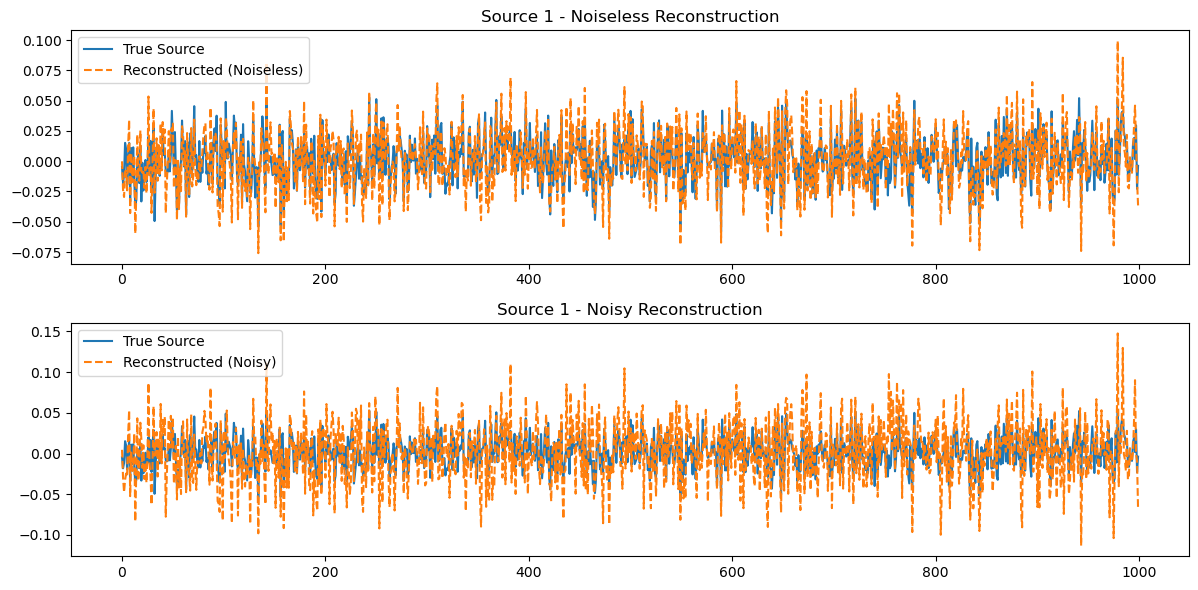

In [8]:
plt.figure(figsize=(12, 6))
source_idx = 0  # Example: first source

plt.subplot(2,1,1)
plt.plot(S_true[source_idx], label="True Source")
plt.plot(S_hat_noiseless[source_idx], '--', label="Reconstructed (Noiseless)")
plt.title(f"Source {source_idx+1} - Noiseless Reconstruction")
plt.legend()

plt.subplot(2,1,2)
plt.plot(S_true[source_idx], label="True Source")
plt.plot(S_hat_noisy[source_idx], '--', label="Reconstructed (Noisy)")
plt.title(f"Source {source_idx+1} - Noisy Reconstruction")
plt.legend()

plt.tight_layout()
plt.show()


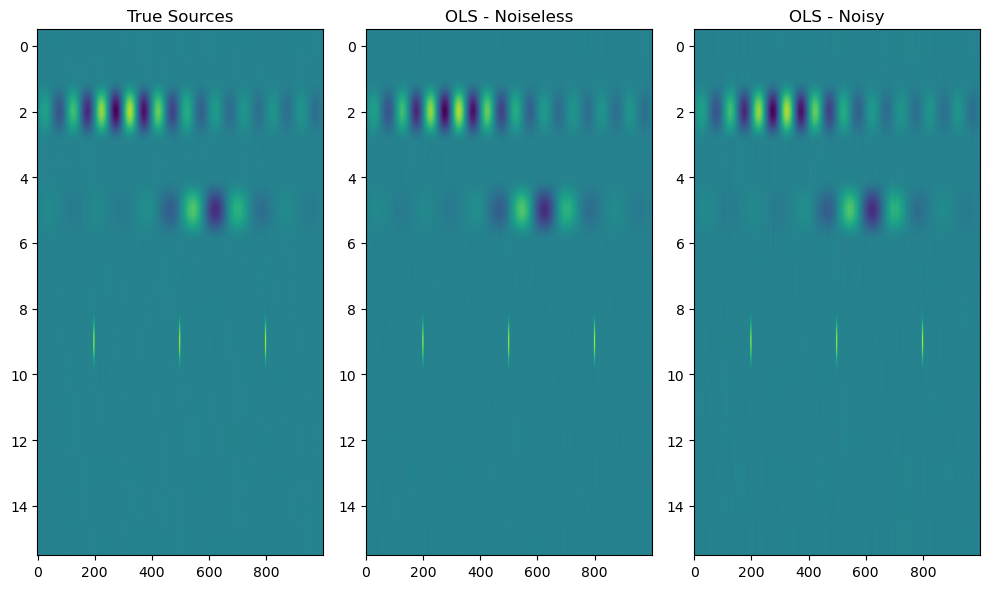

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(S_true, aspect='auto', cmap='viridis')
plt.title("True Sources")

plt.subplot(1,3,2)
plt.imshow(S_hat_noiseless, aspect='auto', cmap='viridis')
plt.title("OLS - Noiseless")

plt.subplot(1,3,3)
plt.imshow(S_hat_noisy, aspect='auto', cmap='viridis')
plt.title("OLS - Noisy")

plt.tight_layout()
plt.show()
